In [4]:
from dataset import *

In [6]:
data = np.load('data/data_125.npz', allow_pickle=True)

In [7]:
(x_train, x_test, y_train, y_test) = data['data']

In [4]:
x_train.shape

(175, 240, 240, 3)

In [5]:
x_test.shape

(44, 240, 240, 3)

In [1]:
from keras import backend as K
from keras import layers as LL
from keras.regularizers import l1,l2,Regularizer
from keras.engine.topology import Layer
from keras.engine.saving import load_weights_from_hdf5_group_by_name
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.merge import Maximum,Concatenate as Concat
from keras.applications import resnet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ModelCheckpoint,CSVLogger
from keras.losses import mean_squared_error

Using TensorFlow backend.


In [8]:
x_t = preprocess_input(x_train)
x_ts = preprocess_input(x_test)

In [9]:
y_t = y_train
y_ts = y_test

In [10]:
layers = resnet50.ResNet50(include_top=False,weights='imagenet',input_shape=(240, 240, 3))
layers.trainable = False
for layer in layers.layers[-20:]:
  layer.trainable = True
x = layers.output
x = LL.Flatten(name='rgb_flatten')(x)
x = LL.core.Dense(1024,activation='relu')(x)
x = LL.core.Dense(512, activation='relu', activity_regularizer=l2(0.01))(x)
output = LL.core.Dense(1)(x)
model = Model(inputs=layers.input,outputs=output)

model.compile(optimizer=Adam(lr=0.0001), loss=mean_squared_error, metrics=['mse'])

C:\Users\Admin\Anaconda3\envs\environment\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [11]:
model.load_weights('model_weighs/model_125_ver5.h5')

In [15]:
model.evaluate(x_ts, y_ts)

44/44 [==============================] - 22s 491ms/step


[7.487483111294833, 0.8314207196235657]

In [31]:
model.predict(np.expand_dims(x_ts[5], axis=0))

array([[15.793117]], dtype=float32)

In [63]:
y_val

array([4, 4, 6, 5, 6, 2, 3, 6, 4, 4, 5, 2])

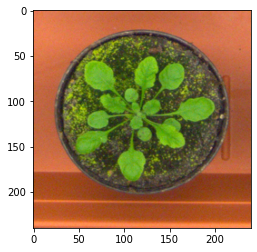

In [32]:
import matplotlib.pyplot as plt
plt.imshow(x_test[5]) 

In [33]:
y_test[5]

16

In [12]:
from model import *

In [13]:
model_test = LeafCountingModel()

C:\Users\Admin\Anaconda3\envs\environment\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [14]:
model_test.predict(np.expand_dims(x_ts[0], axis=0))

array([[17.377426]], dtype=float32)